In [2]:
#%env KERAS_BACKEND=theano  # This is WRONG, use K.set_image_dim_ordering('th') instead

#import numpy
#import theano
#print numpy.__version__
#print theano.__version__
#import keras
#print keras.__version__


import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


#from keras import backend as K
#K.set_image_dim_ordering('th')

%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print X_train.shape
print y_train
print X_test.shape
print y_test

(60000, 28, 28)
[5 0 4 ..., 5 6 8]
(10000, 28, 28)
[7 2 1 ..., 4 5 6]


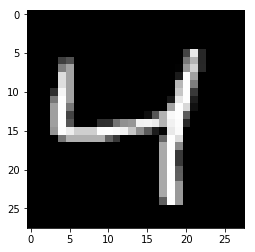

In [4]:
from matplotlib import pyplot as plt
plt.imshow(X_train[2], cmap='gray')

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1 )
print X_train.shape
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

(60000, 28, 28, 1)


In [6]:

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [3]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 26, 26, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 24, 24, 32)    9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 12, 12, 32)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 12, 12, 32)    0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [5]:
model.layers[0].get_config()

{'W_constraint': None,
 'W_regularizer': None,
 'activation': 'relu',
 'activity_regularizer': None,
 'b_constraint': None,
 'b_regularizer': None,
 'batch_input_shape': (None, 28, 28, 1),
 'bias': True,
 'border_mode': 'valid',
 'dim_ordering': 'tf',
 'init': 'glorot_uniform',
 'input_dtype': 'float32',
 'name': 'convolution2d_1',
 'nb_col': 3,
 'nb_filter': 32,
 'nb_row': 3,
 'subsample': (1, 1),
 'trainable': True}

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:

history=model.fit(X_train, Y_train, validation_split=0.2,
          batch_size=400, nb_epoch=20, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s - loss: 0.4949 - acc: 0.8513 - val_loss: 0.1271 - val_acc: 0.9636

In [10]:
score = model.evaluate(X_test, Y_test, verbose=1)

 9728/10000 [============================>.] - ETA: 0s

In [11]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 99.10%


In [24]:
# calculate predictions
predictions = model.predict(X_test)
# round predictions
rounded = [[round(r) for r in x] for x in predictions]
print(predictions)

[[  8.83771096e-22   7.28080519e-14   5.05908057e-16 ...,   1.00000000e+00
    3.04480551e-16   2.60111268e-13]
 [  3.34803053e-11   2.80444279e-10   1.00000000e+00 ...,   9.37561248e-18
    3.15508606e-18   3.18404772e-23]
 [  6.76156798e-15   1.00000000e+00   4.70674423e-14 ...,   1.31188865e-10
    3.42826001e-13   3.79459105e-14]
 ..., 
 [  9.33201338e-32   3.16500551e-19   1.41851908e-22 ...,   3.79040254e-18
    1.19370835e-19   2.90459985e-15]
 [  4.22028086e-18   8.01723677e-20   6.65897054e-24 ...,   1.17311439e-19
    1.21686003e-15   9.92773486e-18]
 [  2.60738642e-13   1.58525764e-22   1.33923995e-16 ...,   4.87890055e-28
    1.23622621e-14   8.39516784e-20]]


In [25]:
print (Y_test)
rm=np.array(rounded)
print (rm)
rm.shape

np.subtract(Y_test, rm)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, rm)
print (mse)

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
0.00149


['acc', 'loss', 'val_acc', 'val_loss']


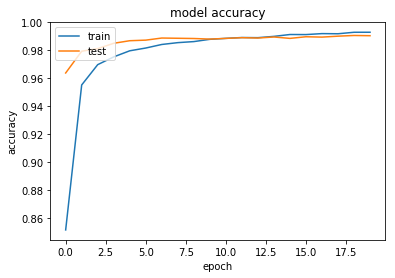

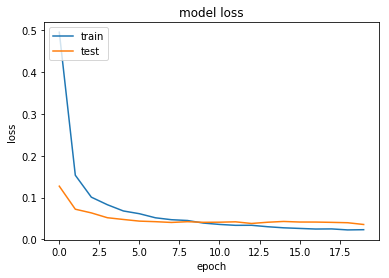

In [12]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
from keras.utils.visualize_util import plot
plot(model)

ImportError: No module named pydot